In [573]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [574]:
def Pca(X, k):
    X_0 = (X - np.mean(X,axis = 0)) / np.std(X,axis = 0)
    cov_0 = np.cov(X_0, rowvar=False)
    w, v = np.linalg.eigh(cov_0)
    w = np.flip(w,axis = 0)
    v = np.flip(v,axis = 1)
    X_pc = np.dot(X_0,v) * np.sqrt(1/w)
    return X_pc[:,:k]

def Pca2(X, threshold = 0.9):
    X_0 = (X - np.mean(X,axis = 0)) / np.std(X,axis = 0)
    cov_0 = np.cov(X_0, rowvar=False)
    w, v = np.linalg.eigh(cov_0)
    w = np.flip(w,axis = 0)
    v = np.flip(v,axis = 1)
    X_pc = np.dot(X_0,v) * np.sqrt(1/w)
    i = 1
    s = np.sum(w)
    while(np.sum(w[:i])/s < threshold):
        i+=1
    return X_pc[:,:i], i
    
def singleplot(X, y, labels, colors):
    plt.figure(figsize=(10,10))
    for label, color in zip(labels, colors):
        plt.scatter(X[y == label, 0], X[y == label, 1], c = color)
        plt.axis('equal')
    plt.show()

def multiplot(X, y, labels, colors):
    N, d = X.shape
    plt.figure(figsize=(20,20))
    if(d > 5): d = 5
    for i in range(d):
        for j in range(i+1,d):
            plt.subplot(d, d, i * d + j + 1)
            for label, color in zip(labels, colors):
                plt.scatter(X[y == label, i], X[y == label, j], c = color)
                plt.axis('equal')
    plt.show()

# IRIS

In [575]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_pc = Pca(X,2)

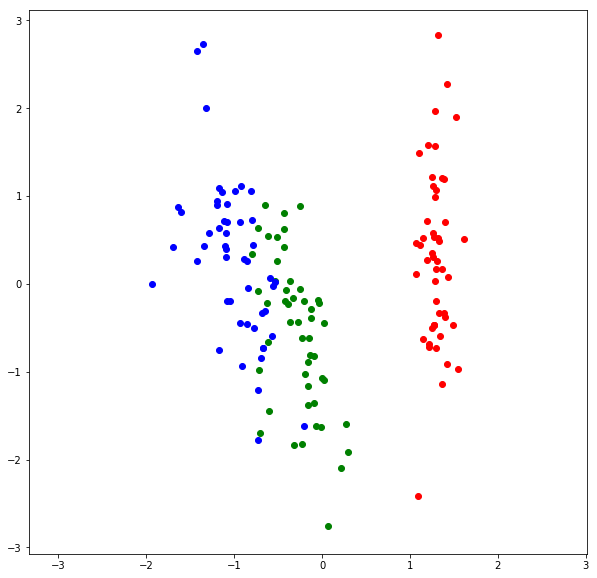

In [576]:
singleplot(X_pc,y,[0,1,2],'rgb')

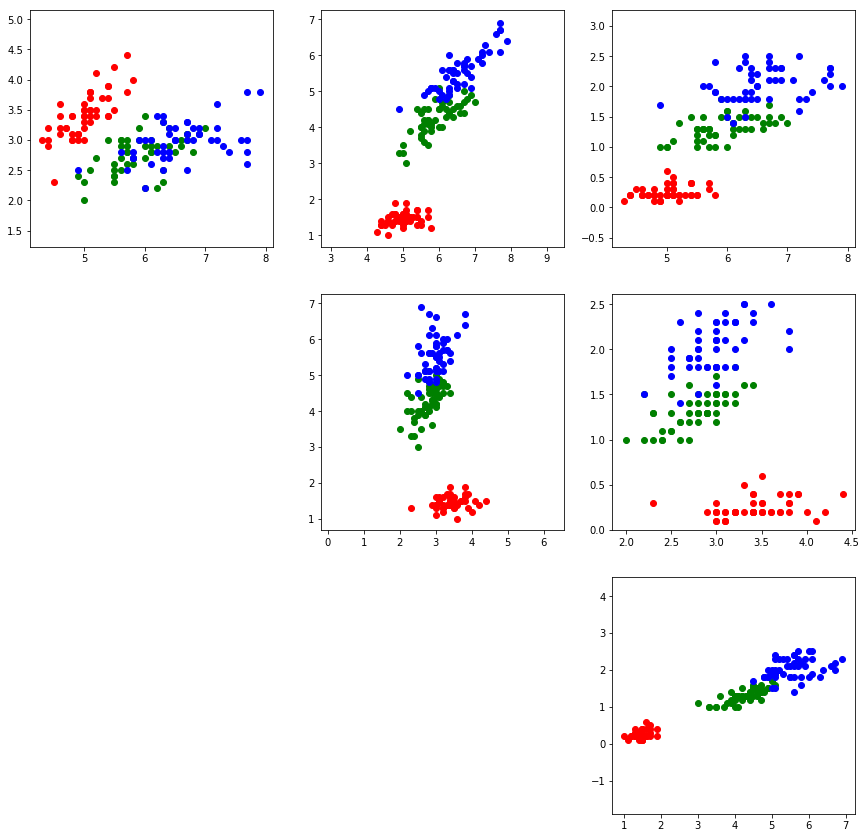

In [577]:
multiplot(X,y,[0,1,2],"rgb")

Liczba składowych głównych: 2
Wskaźnik jakości grupowania dla X:  0.552591944521
Wskaźnik jakości grupowania dla X_pc:  0.478016107461


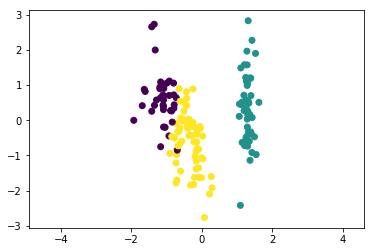

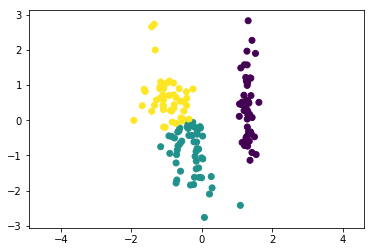

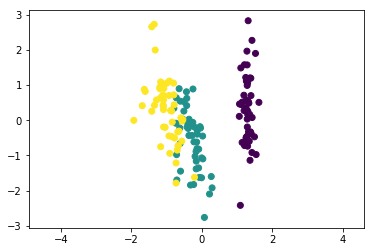

In [578]:
X_pc, k = Pca2(X, 0.75)
print("Liczba składowych głównych:",k)

k_means1 = KMeans(init='k-means++', n_clusters=3)
k_means1.fit(X)
k_means2 = KMeans(init='k-means++', n_clusters=3)
k_means2.fit(X_pc)
print("Wskaźnik jakości grupowania dla X: ",silhouette_score(X, k_means1.labels_))
print("Wskaźnik jakości grupowania dla X_pc: ",silhouette_score(X_pc, k_means2.labels_))

plt.scatter(X_pc[:,0], X_pc[:,1], c = k_means1.labels_)
plt.axis('equal')
plt.show()
plt.scatter(X_pc[:,0], X_pc[:,1], c = k_means2.labels_)
plt.axis('equal')
plt.show()
plt.scatter(X_pc[:,0], X_pc[:,1], c = y)
plt.axis('equal')
plt.show()

# WINE

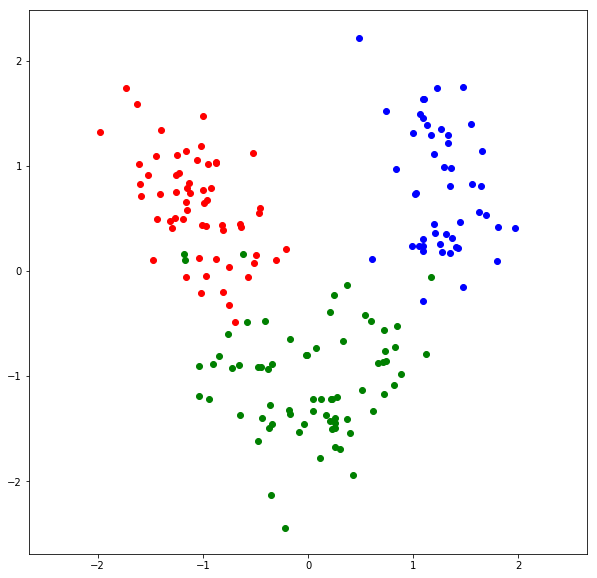

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [579]:
wine = pd.read_csv("wine.csv")
y = wine['Wine'].as_matrix()
X = wine.drop('Wine',axis = 1).as_matrix()
X_pc = Pca(X,2)
singleplot(X_pc,y,[1,2,3],'rgb')
wine.head()

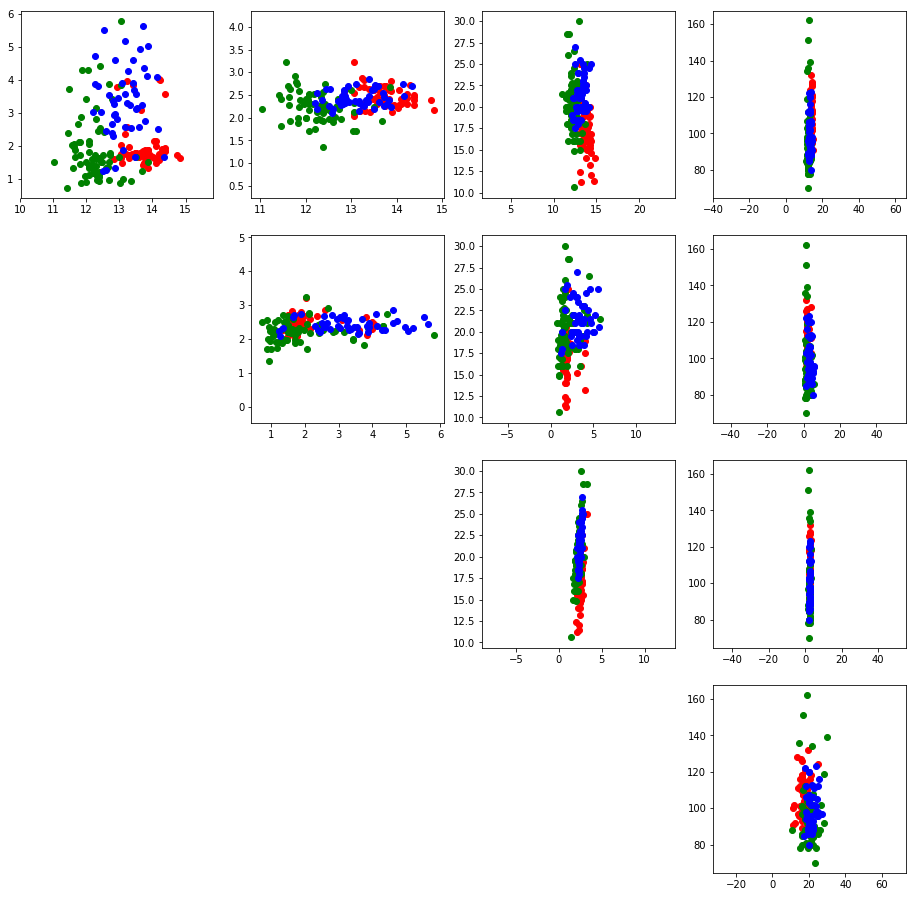

In [580]:
multiplot(X,y,[1,2,3],"rgb")

Liczba składowych głównych: 8
Wskaźnik jakości grupowania dla X:  0.571138193787
Wskaźnik jakości grupowania dla X_pc:  0.147466902481


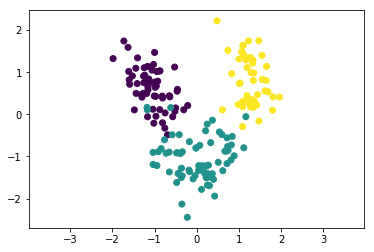

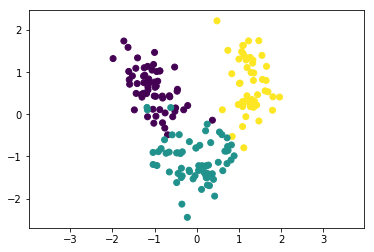

In [581]:
X_pc, k = Pca2(X, 0.9)
print("Liczba składowych głównych:",k)

k_means1 = KMeans(init='k-means++', n_clusters=3)
k_means1.fit(X)
k_means2 = KMeans(init='k-means++', n_clusters=3)
k_means2.fit(X_pc)
print("Wskaźnik jakości grupowania dla X: ",silhouette_score(X, k_means1.labels_))
print("Wskaźnik jakości grupowania dla X_pc: ",silhouette_score(X_pc, k_means2.labels_))

plt.scatter(X_pc[:,0], X_pc[:,1], c = y)
plt.axis('equal')
plt.show()

plt.scatter(X_pc[:,0], X_pc[:,1], c = k_means2.labels_)
plt.axis('equal')
plt.show()

In [582]:
from sklearn import tree
from sklearn import cross_validation

t = tree.DecisionTreeClassifier(max_depth=3)
r1 = cross_validation.cross_val_score(t, X, y, cv = 10)
r2 = cross_validation.cross_val_score(t, X_pc, y, cv = 10)
print(r1.mean(),r2.mean())

0.866924664603 0.938854489164


# MUSHROOMS

In [583]:
mushrooms = pd.read_csv("mushrooms.csv")
mushrooms.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


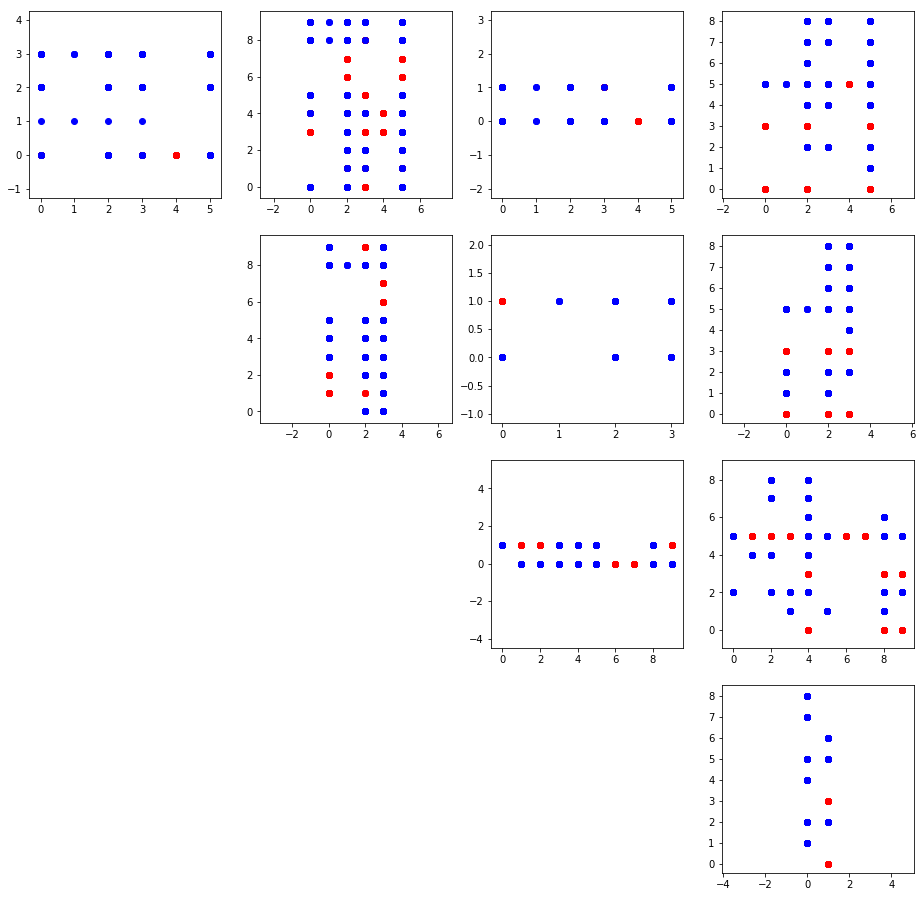

In [584]:
mushrooms = mushrooms.dropna()

for column in mushrooms.columns:
    mushrooms[column] = pd.Categorical(mushrooms[column]).codes

y = (mushrooms['type']).as_matrix()
X = (mushrooms.drop('type',axis = 1)).as_matrix()
multiplot(X,y,[0,1],"rb")

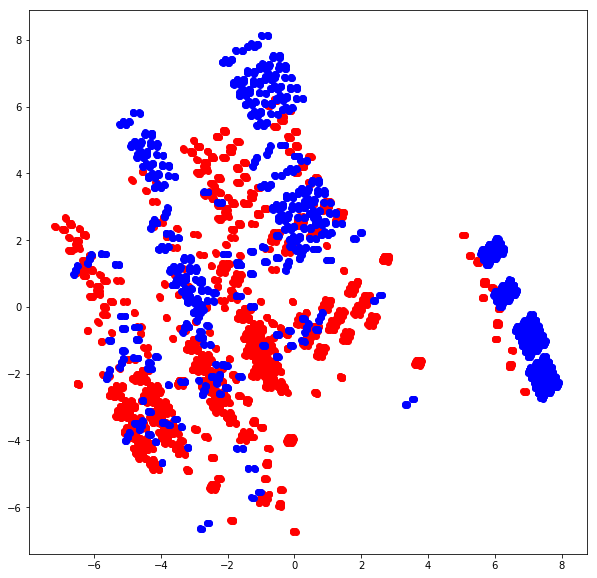

In [585]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_pc = pca.fit_transform(X)
singleplot(X_pc, y, [0,1], 'rb')

In [586]:
t = tree.DecisionTreeClassifier(max_depth=3)
r1 = cross_validation.cross_val_score(t, X, y, cv = 10)
r2 = cross_validation.cross_val_score(t, X_pc, y, cv = 10)
print(r1.mean(),r2.mean())

0.925545732646 0.792209064712


# ADULT

In [587]:
adult = pd.read_csv("adult.csv")
adult.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [588]:
adult.dropna()
names = ['Age',' fnlwgt',' education-num',' capital-gain',' capital-loss',' hours-per-week']
for column in adult.columns:
    if not(column in names): 
        adult[column] = pd.Categorical(adult[column]).codes
print(adult.shape)
adult.head()

(32561, 15)


,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [589]:
y = adult[' class'].as_matrix()
X = adult.drop(' class',axis = 1).as_matrix()

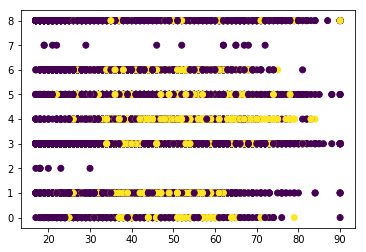

In [590]:
plt.scatter(X[:,0],X[:,1], c = y)
plt.show()

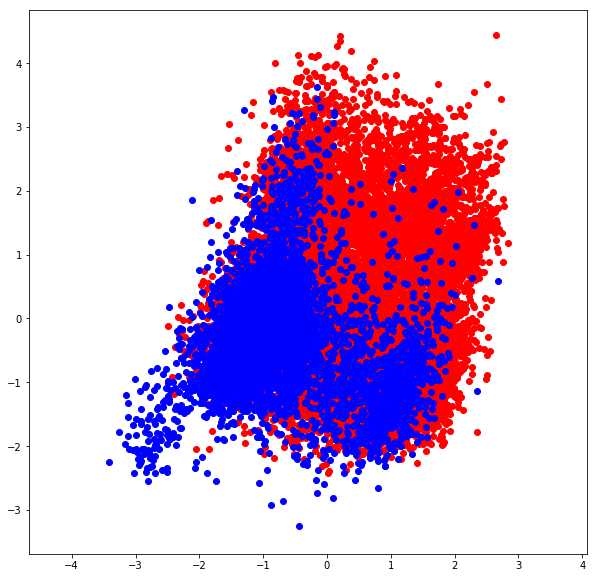

In [591]:
X_pc = Pca(X,2)
#X_pc,k = Pca2(X,0.9)
singleplot(X_pc,y,[0,1],'rb')

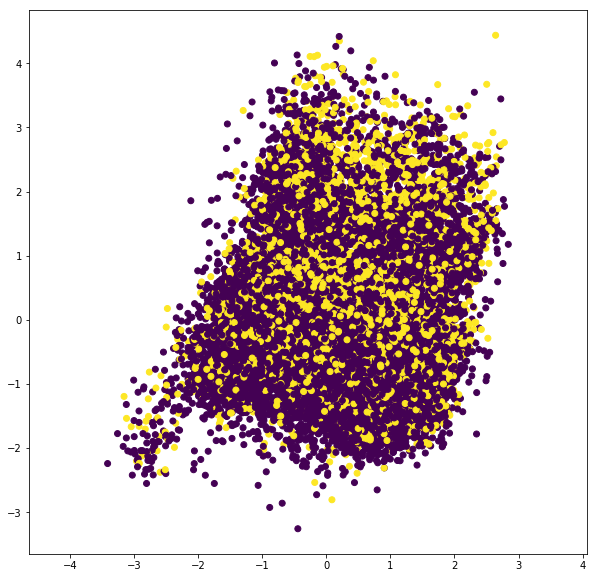

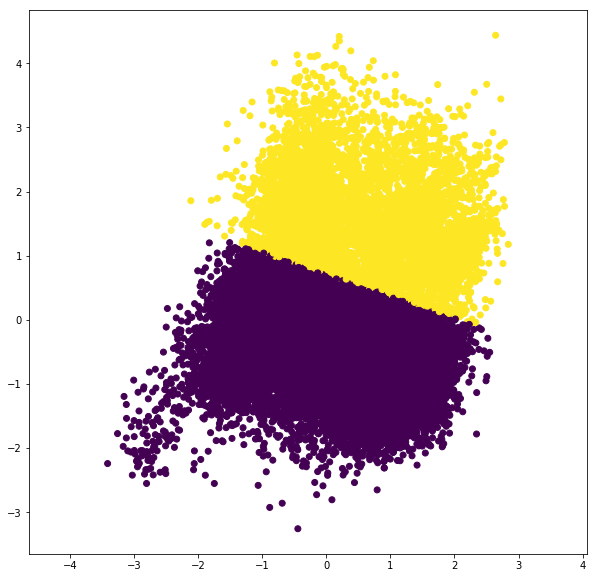

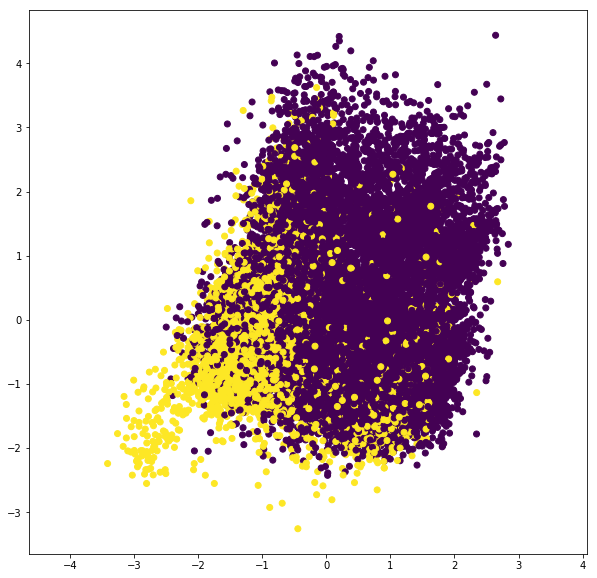

In [592]:
k_means1 = KMeans(init='k-means++', n_clusters=2, n_init=2)
k_means1.fit(X)
k_means2 = KMeans(init='k-means++', n_clusters=2, n_init=2)
k_means2.fit(X_pc)
#print("Wskaźnik jakości grupowania dla X: ",silhouette_score(X, k_means1.labels_))
#print("Wskaźnik jakości grupowania dla X_pc: ",silhouette_score(X_pc, k_means2.labels_))

plt.figure(figsize=(10,10))
plt.scatter(X_pc[:,0], X_pc[:,1], c = k_means1.labels_ )
plt.axis('equal')
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(X_pc[:,0], X_pc[:,1], c = k_means2.labels_)
plt.axis('equal')
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(X_pc[:,0], X_pc[:,1], c = y)
plt.axis('equal')
plt.show()

In [593]:
t = tree.DecisionTreeClassifier(max_depth=3)
r1 = cross_validation.cross_val_score(t, X, y, cv = 10)
r2 = cross_validation.cross_val_score(t, X_pc, y, cv = 10)
print(r1.mean(),r2.mean())

0.839870060629 0.802616807572


# CARS

In [594]:
cars = pd.read_csv("cars.csv")
cars = cars.dropna()
cars = cars.drop('Unnamed: 0',axis=1)
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


In [595]:
y = cars['class'].as_matrix()
X = cars.drop('class',axis = 1).as_matrix()
print(X.shape)
X_pc = Pca(X,2)

(1728, 6)


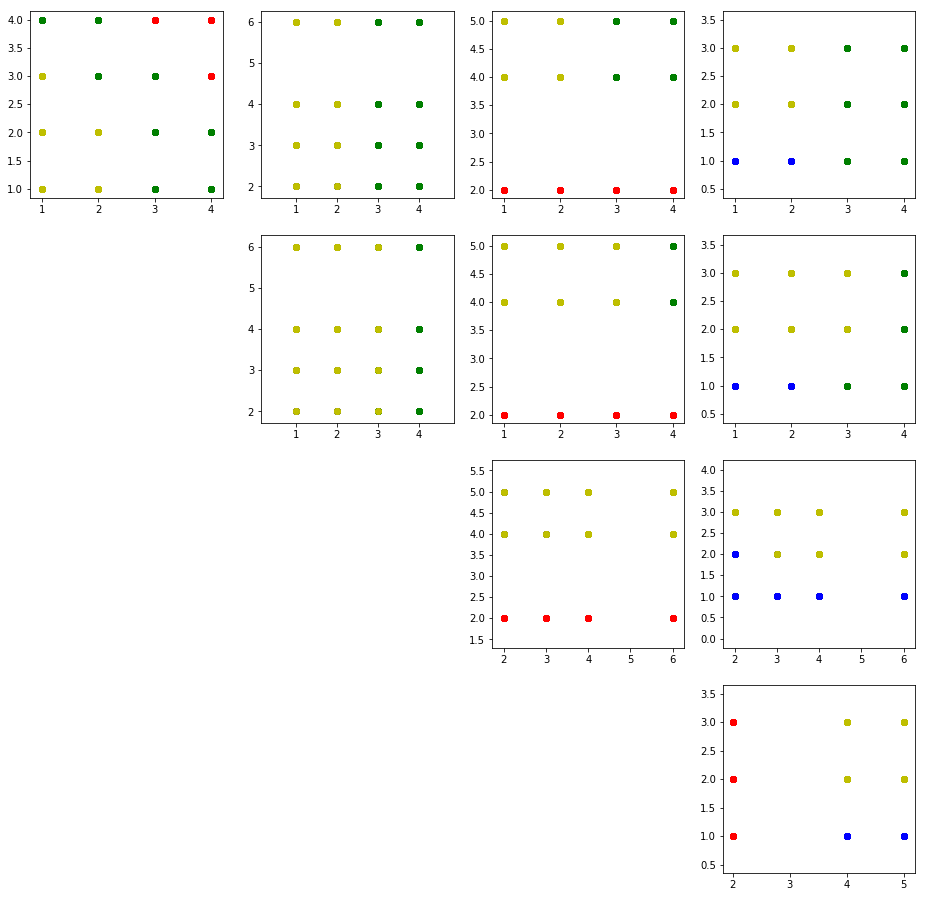

In [596]:
multiplot(X,y,[1,2,3,4],"rgby")

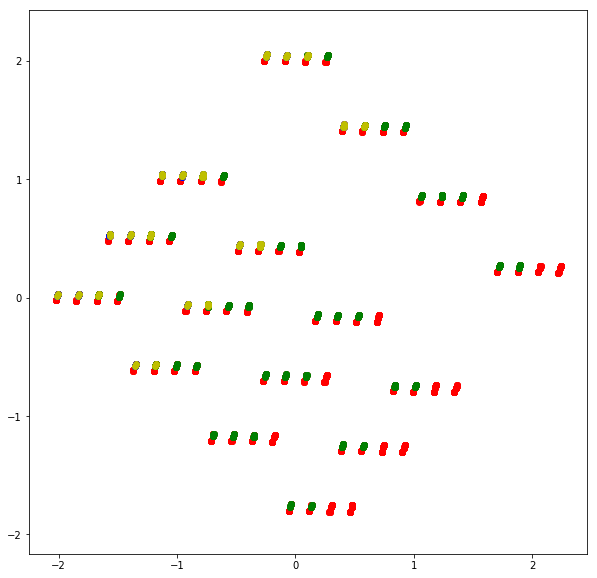

In [597]:
singleplot(X_pc,y,[1,2,3,4],'rgby')

Wskaźnik jakości grupowania dla X:  0.245053609592
Wskaźnik jakości grupowania dla X_pc:  0.382612260001


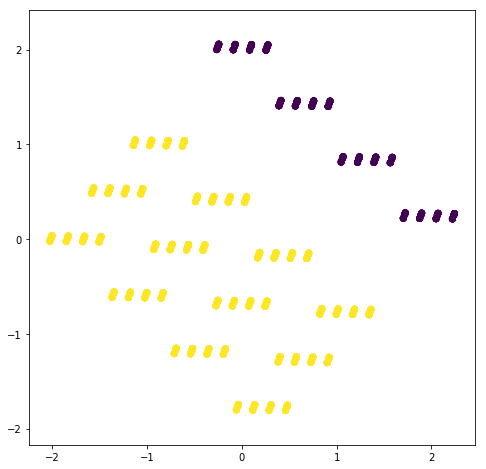

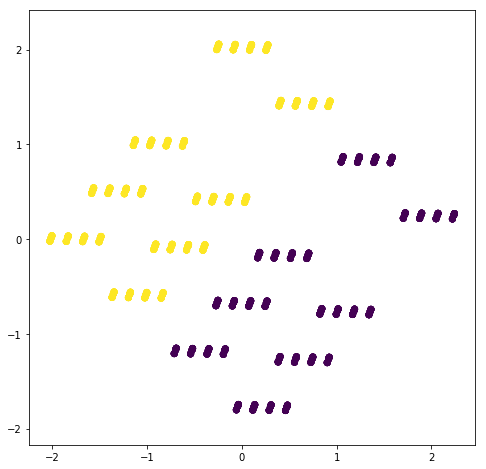

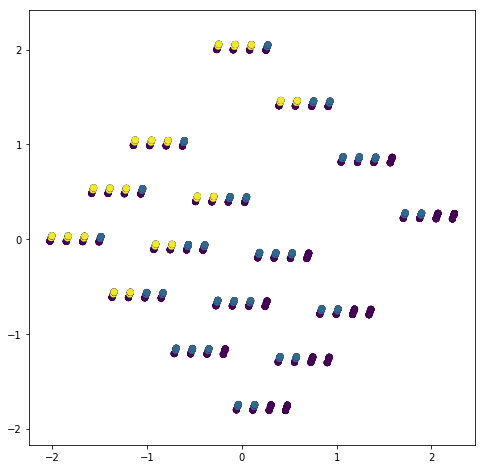

In [600]:
k_means1 = KMeans(init='k-means++', n_clusters=2, n_init=2)
k_means1.fit(X)
k_means2 = KMeans(init='k-means++', n_clusters=2, n_init=2)
k_means2.fit(X_pc)
print("Wskaźnik jakości grupowania dla X: ",silhouette_score(X, k_means1.labels_))
print("Wskaźnik jakości grupowania dla X_pc: ",silhouette_score(X_pc, k_means2.labels_))

plt.figure(figsize=(8,8))
plt.scatter(X_pc[:,0], X_pc[:,1], c = k_means1.labels_ )
plt.axis('equal')
plt.show()

plt.figure(figsize=(8,8))
plt.scatter(X_pc[:,0], X_pc[:,1], c = k_means2.labels_)
plt.axis('equal')
plt.show()

plt.figure(figsize=(8,8))
plt.scatter(X_pc[:,0], X_pc[:,1], c = y)
plt.axis('equal')
plt.show()

In [601]:
t = tree.DecisionTreeClassifier(max_depth=3)
r1 = cross_validation.cross_val_score(t, X, y, cv = 10)
r2 = cross_validation.cross_val_score(t, X_pc, y, cv = 10)
print(r1.mean(),r2.mean())

0.752813214887 0.619804508815
